In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Specify directory/file paths
data_dir = "Data"

sim_data_file = "DIBS_simulated_fmri_var4model.csv"

In [3]:
# Load data
data = pd.read_csv(os.path.join(data_dir, sim_data_file), header=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,29.289019,33.484715,33.357838,30.492201,30.765345,29.409662,32.390454,34.480410,32.245588,32.924852,...,30.595113,31.211688,31.633938,28.603127,30.243806,31.902274,32.177479,28.321272,30.704222,35.838620
1,31.566575,28.703860,32.800320,30.742553,32.973998,32.508277,34.237903,34.686537,32.994585,32.643972,...,31.357649,33.732831,30.026795,30.054632,30.970367,32.371300,34.189654,34.669279,35.580278,32.112060
2,35.104468,31.798851,34.287203,33.647496,33.587711,35.285930,34.176086,32.455849,34.077551,31.370822,...,29.308797,28.215622,32.468534,32.522033,31.793905,30.762018,30.195970,31.770087,33.420589,35.058752
3,30.993886,34.659743,37.344212,36.436306,37.077792,35.270085,36.665054,36.098563,35.792556,30.770861,...,34.052446,35.106103,37.075949,33.642532,32.766403,32.697285,34.024612,29.855947,35.395989,34.153510
4,35.754337,35.861791,35.129110,38.133572,36.410361,37.260194,35.336919,36.024182,32.741023,37.461137,...,34.383754,38.475876,29.174330,33.992502,34.385723,34.743098,32.201603,35.483379,34.552669,35.088259


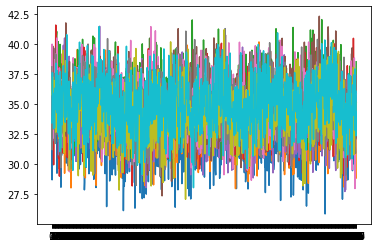

In [4]:
# Plot all results
fig, ax = plt.subplots()
for i in np.arange(1, len(data)+1, 5):
    ax.plot(data.iloc[i, :])

In [5]:
data = data.reset_index(drop=False).rename(columns={"index":"region_id"})
data.head()

,region_id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,29.289019,33.484715,33.357838,30.492201,30.765345,29.409662,32.390454,34.480410,32.245588,...,30.595113,31.211688,31.633938,28.603127,30.243806,31.902274,32.177479,28.321272,30.704222,35.838620
1,1,31.566575,28.703860,32.800320,30.742553,32.973998,32.508277,34.237903,34.686537,32.994585,...,31.357649,33.732831,30.026795,30.054632,30.970367,32.371300,34.189654,34.669279,35.580278,32.112060
2,2,35.104468,31.798851,34.287203,33.647496,33.587711,35.285930,34.176086,32.455849,34.077551,...,29.308797,28.215622,32.468534,32.522033,31.793905,30.762018,30.195970,31.770087,33.420589,35.058752
3,3,30.993886,34.659743,37.344212,36.436306,37.077792,35.270085,36.665054,36.098563,35.792556,...,34.052446,35.106103,37.075949,33.642532,32.766403,32.697285,34.024612,29.855947,35.395989,34.153510
4,4,35.754337,35.861791,35.129110,38.133572,36.410361,37.260194,35.336919,36.024182,32.741023,...,34.383754,38.475876,29.174330,33.992502,34.385723,34.743098,32.201603,35.483379,34.552669,35.088259


In [6]:
long_data = pd.melt(data, id_vars="region_id", var_name="time_index")
long_data[['region_id', 'time_index']] = long_data[['region_id', 'time_index']].astype('int')
long_data

,region_id,time_index,value
0,0,0,29.289019
1,1,0,31.566575
2,2,0,35.104468
3,3,0,30.993886
4,4,0,35.754337
...,...,...,...
49995,45,999,37.503186
49996,46,999,36.060643
49997,47,999,34.656047
49998,48,999,32.964223


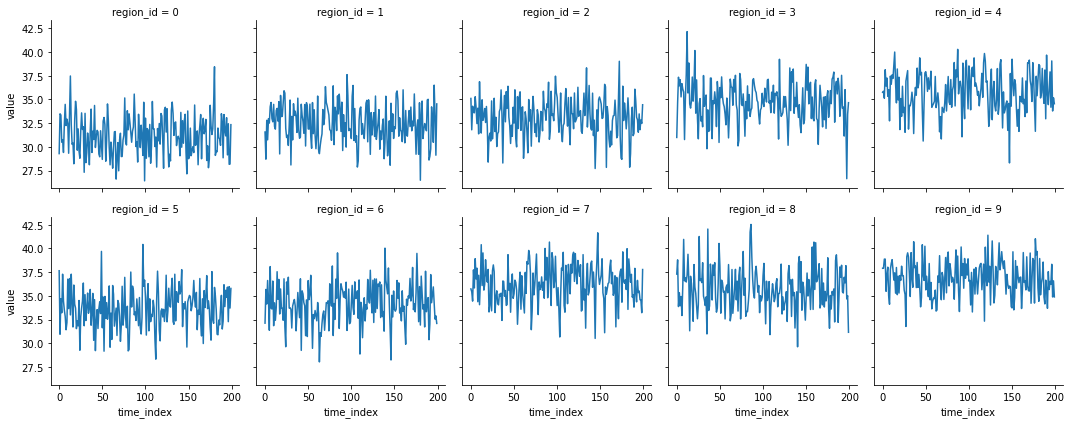

In [11]:
data_subset = long_data.loc[(long_data['region_id'] <10) & (long_data['time_index'] < 200)]
g = sns.FacetGrid(data_subset, col="region_id", col_wrap=5)
g.map_dataframe(sns.lineplot, x="time_index", y="value")